In [1]:
# !wget https://raw.githubusercontent.com/manavnanwani/Review-Analysis/main/admin/product_reviews.json

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
sns.set()
df_init = pd.read_json("routes/product_reviews.json", lines=True)
pd.set_option("display.max_columns", None)
split_df = pd.DataFrame(df_init["helpful"].tolist(), columns=["helpful/0", "helpful/1"])
df_init.drop("helpful", axis=1)
df = pd.concat([df_init, split_df], axis=1)

In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful/0,helpful/1
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014",0,0
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012",0,0
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013",0,1
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013",0,0
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009",1,1


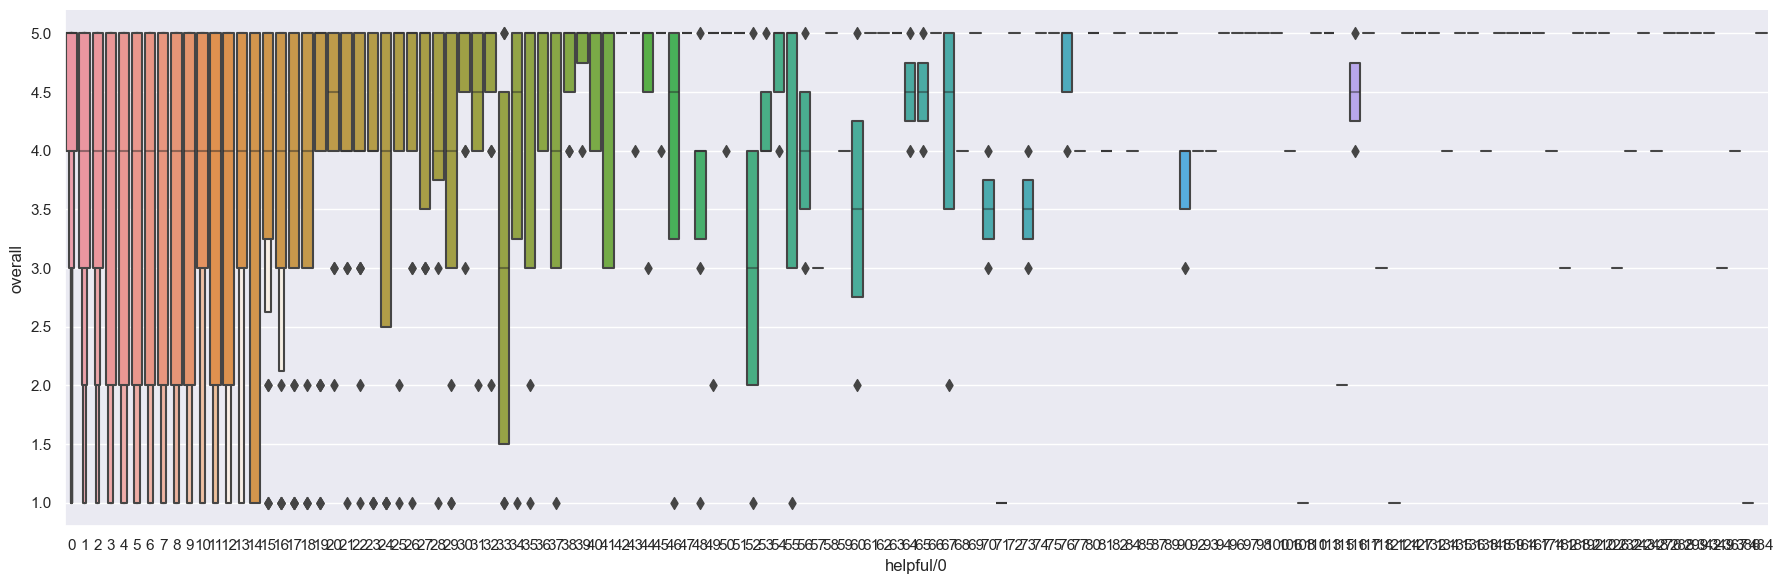

In [5]:
sns.catplot(
    y="overall",
    x="helpful/0",
    data=df.sort_values("overall", ascending=False),
    kind="boxen",
    height=6,
    aspect=3,
)
plt.show()

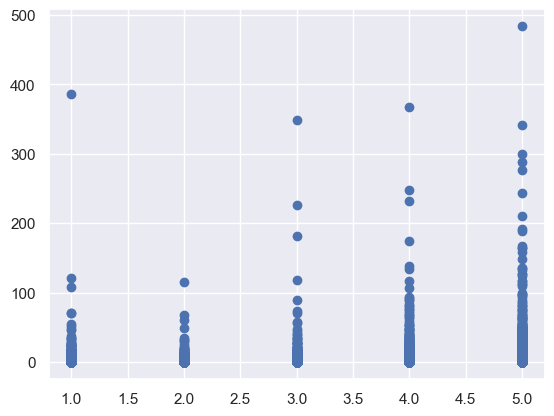

In [6]:
x = df["overall"]
y = df["helpful/0"]
plt.scatter(x, y)
plt.show()

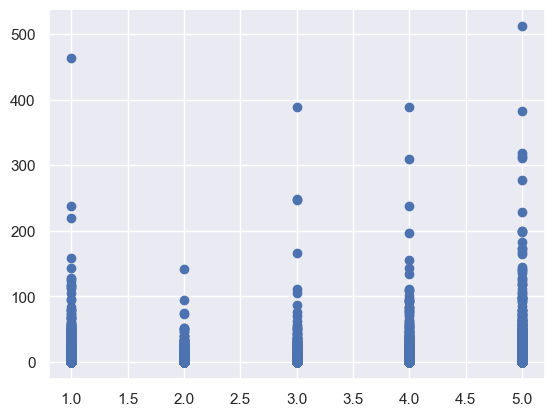

In [7]:
x = df["overall"]
y = df["helpful/1"]
plt.scatter(x, y)
plt.show()

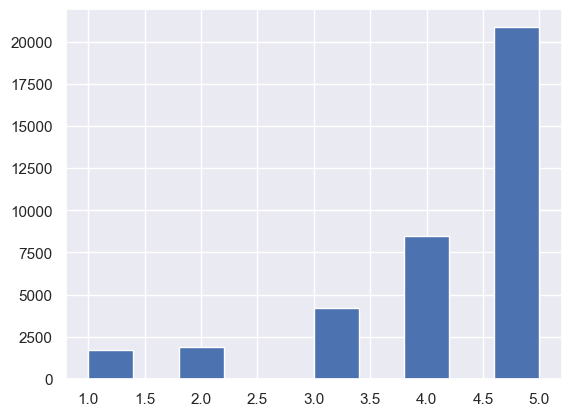

In [8]:
plt.hist(x)
plt.show()

In [9]:
a = df.head(25)
us_graph = nx.from_pandas_edgelist(a, source="reviewerID", target="overall")

In [10]:
nx.info(us_graph)

C:\Users\hisha\AppData\Local\Temp\ipykernel_7436\1266151922.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(us_graph)


'Graph with 27 nodes and 24 edges'

In [11]:
us_graph.nodes()

NodeView(('A11N155CW1UV02', 2, 'A3BC8O2KCL29V2', 5, 'A60D5HQFOTSOM', 1, 'A1RJPIGRSNX4PW', 4, 'A16XRPF40679KG', 'A1POFVVXUZR3IQ', 'A1PG2VV4W1WRPL', 3, 'ATASGS8HZHGIB', 'A3RXD7Z44T9DHW', 'AUX8EUBNTHIIU', 'AXM3GQLD0CHIL', 'A398QSASJOIKA6', 'A2U61O0KWJH3MM', 'A2LSZFEFTDRDIJ', 'A39F2EW27YYUDM', 'AO1Z63O9CTT95', 'A1378ZJMWCTVT3', 'A2JE0JYIZL5NU4', 'AAWV26JJ1SGS0', 'AS2AMJR6JJZSS', 'AYCGI5JRRISTJ', 'A1939G7K0LLQ8P'))

In [12]:
len(us_graph.nodes())

27

In [13]:
us_graph.edges()

EdgeView([('A11N155CW1UV02', 2), (2, 'AO1Z63O9CTT95'), ('A3BC8O2KCL29V2', 5), (5, 'A16XRPF40679KG'), (5, 'A1POFVVXUZR3IQ'), (5, 'A3RXD7Z44T9DHW'), (5, 'A39F2EW27YYUDM'), (5, 'A2LSZFEFTDRDIJ'), (5, 'AS2AMJR6JJZSS'), (5, 'AXM3GQLD0CHIL'), (5, 'AYCGI5JRRISTJ'), ('A60D5HQFOTSOM', 1), ('A1RJPIGRSNX4PW', 4), (4, 'AXM3GQLD0CHIL'), (4, 'A398QSASJOIKA6'), ('A1PG2VV4W1WRPL', 3), (3, 'ATASGS8HZHGIB'), (3, 'AUX8EUBNTHIIU'), (3, 'A2U61O0KWJH3MM'), (3, 'A2LSZFEFTDRDIJ'), (3, 'A1378ZJMWCTVT3'), (3, 'A2JE0JYIZL5NU4'), (3, 'AAWV26JJ1SGS0'), (3, 'A1939G7K0LLQ8P')])

In [14]:
len(us_graph.edges())

24

In [15]:
nx.draw(us_graph)

In [16]:
# Most Influential Node
degree_centrality = nx.degree_centrality(us_graph)
for w in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
    print(w, degree_centrality[w])

5 0.34615384615384615
3 0.34615384615384615
4 0.11538461538461539
2 0.07692307692307693
AXM3GQLD0CHIL 0.07692307692307693
A2LSZFEFTDRDIJ 0.07692307692307693
A11N155CW1UV02 0.038461538461538464
A3BC8O2KCL29V2 0.038461538461538464
A60D5HQFOTSOM 0.038461538461538464
1 0.038461538461538464
A1RJPIGRSNX4PW 0.038461538461538464
A16XRPF40679KG 0.038461538461538464
A1POFVVXUZR3IQ 0.038461538461538464
A1PG2VV4W1WRPL 0.038461538461538464
ATASGS8HZHGIB 0.038461538461538464
A3RXD7Z44T9DHW 0.038461538461538464
AUX8EUBNTHIIU 0.038461538461538464
A398QSASJOIKA6 0.038461538461538464
A2U61O0KWJH3MM 0.038461538461538464
A39F2EW27YYUDM 0.038461538461538464
AO1Z63O9CTT95 0.038461538461538464
A1378ZJMWCTVT3 0.038461538461538464
A2JE0JYIZL5NU4 0.038461538461538464
AAWV26JJ1SGS0 0.038461538461538464
AS2AMJR6JJZSS 0.038461538461538464
AYCGI5JRRISTJ 0.038461538461538464
A1939G7K0LLQ8P 0.038461538461538464


In [17]:
# Most Important Connection
eigenvector_centrality = nx.eigenvector_centrality(us_graph)
for w in sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True):
    print(w, eigenvector_centrality[w])

5 0.5145473844658457
3 0.47953025035463237
A2LSZFEFTDRDIJ 0.3132110561383412
AXM3GQLD0CHIL 0.18504050502249816
A3BC8O2KCL29V2 0.16212071852033663
A16XRPF40679KG 0.16212071852033663
A1POFVVXUZR3IQ 0.16212071852033663
A3RXD7Z44T9DHW 0.16212071852033663
A39F2EW27YYUDM 0.16212071852033663
AS2AMJR6JJZSS 0.16212071852033663
AYCGI5JRRISTJ 0.16212071852033663
A1PG2VV4W1WRPL 0.15109033761800456
ATASGS8HZHGIB 0.15109033761800456
AUX8EUBNTHIIU 0.15109033761800456
A2U61O0KWJH3MM 0.15109033761800456
A1378ZJMWCTVT3 0.15109033761800456
A2JE0JYIZL5NU4 0.15109033761800456
AAWV26JJ1SGS0 0.15109033761800456
A1939G7K0LLQ8P 0.15109033761800456
4 0.07274426530155527
A1RJPIGRSNX4PW 0.022919786502161515
A398QSASJOIKA6 0.022919786502161515
2 6.102488250357286e-12
A11N155CW1UV02 4.3151108239388665e-12
AO1Z63O9CTT95 4.3151108239388665e-12
A60D5HQFOTSOM 1.0597543963727865e-15
1 1.0597543963727865e-15


In [18]:
closeness_centrality = nx.closeness_centrality(us_graph)
for w in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
    print(w, closeness_centrality[w])

5 0.3944543828264758
A2LSZFEFTDRDIJ 0.3769230769230769
3 0.34615384615384615
AXM3GQLD0CHIL 0.2975708502024291
A3BC8O2KCL29V2 0.2692307692307692
A16XRPF40679KG 0.2692307692307692
A1POFVVXUZR3IQ 0.2692307692307692
A3RXD7Z44T9DHW 0.2692307692307692
A39F2EW27YYUDM 0.2692307692307692
AS2AMJR6JJZSS 0.2692307692307692
AYCGI5JRRISTJ 0.2692307692307692
A1PG2VV4W1WRPL 0.24581939799331107
ATASGS8HZHGIB 0.24581939799331107
AUX8EUBNTHIIU 0.24581939799331107
A2U61O0KWJH3MM 0.24581939799331107
A1378ZJMWCTVT3 0.24581939799331107
A2JE0JYIZL5NU4 0.24581939799331107
AAWV26JJ1SGS0 0.24581939799331107
A1939G7K0LLQ8P 0.24581939799331107
4 0.23234984193888303
A1RJPIGRSNX4PW 0.18238213399503722
A398QSASJOIKA6 0.18238213399503722
2 0.07692307692307693
A11N155CW1UV02 0.05128205128205128
AO1Z63O9CTT95 0.05128205128205128
A60D5HQFOTSOM 0.038461538461538464
1 0.038461538461538464


In [19]:
# Best Connector
betweenness_centrality = nx.betweenness_centrality(us_graph)
for w in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
    print(w, betweenness_centrality[w])

5 0.48923076923076925
3 0.40615384615384614
A2LSZFEFTDRDIJ 0.3323076923076923
AXM3GQLD0CHIL 0.16615384615384615
4 0.12
2 0.003076923076923077
A11N155CW1UV02 0.0
A3BC8O2KCL29V2 0.0
A60D5HQFOTSOM 0.0
1 0.0
A1RJPIGRSNX4PW 0.0
A16XRPF40679KG 0.0
A1POFVVXUZR3IQ 0.0
A1PG2VV4W1WRPL 0.0
ATASGS8HZHGIB 0.0
A3RXD7Z44T9DHW 0.0
AUX8EUBNTHIIU 0.0
A398QSASJOIKA6 0.0
A2U61O0KWJH3MM 0.0
A39F2EW27YYUDM 0.0
AO1Z63O9CTT95 0.0
A1378ZJMWCTVT3 0.0
A2JE0JYIZL5NU4 0.0
AAWV26JJ1SGS0 0.0
AS2AMJR6JJZSS 0.0
AYCGI5JRRISTJ 0.0
A1939G7K0LLQ8P 0.0


In [20]:
group1 = nx.bfs_tree(us_graph, "A2LSZFEFTDRDIJ")

In [21]:
group2 = nx.bfs_tree(us_graph, "AXM3GQLD0CHIL")

In [22]:
nx.draw_networkx(group1)

In [23]:
nx.draw_networkx(group2)

In [24]:
import sys
import json
import pickle
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [25]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
with open("routes/product_reviews.json") as f:
    reviews = f.read().strip().split("\n")
reviews = [json.loads(review) for review in reviews]
texts = [review["reviewText"] for review in reviews]
stars = [review["overall"] for review in reviews]

In [38]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vectors = vectorizer.fit_transform(texts)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    vectors, stars, test_size=0.1, random_state=42
)

In [29]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
with open("routes/DT_Classifier.pkl", "wb") as fid:
    pickle.dump(classifier_DT, fid)
preds = classifier_DT.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])
print(accuracy_score(y_test, preds))

[5.0, 4.0, 1.0, 5.0, 5.0, 5.0, 2.0, 5.0, 5.0, 5.0]
[5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0]
0.5092916778884998


In [30]:
classifier_SVM = LinearSVC()
classifier_SVM.fit(X_train, y_train)
with open("routes/SVM_Classifier.pkl", "wb") as fid:
    pickle.dump(classifier_SVM, fid)
preds = classifier_SVM.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])
print(accuracy_score(y_test, preds))

[4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0]
[5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0]
0.6520333961755993


In [31]:
contents = "BAD BAD BAD BAD BAD"
list1 = [contents]
stop_words = set(stopwords.words("english"))
words = contents.split()
rcount = 0
tokenizedtext = " "
for r in words:
    if not r in stop_words:
        tokenizedtext = tokenizedtext + " " + r
        rcount = rcount + 1

In [32]:
if rcount == 0:
    print("no review")
else:
    list1 = [tokenizedtext]
    vec1 = vectorizer.transform(list1)
    with open("routes/DT_Classifier.pkl", "rb") as fid:
        loaded_classifier = pickle.load(fid)
    mypred = loaded_classifier.predict(vec1)
    print(int(mypred[0]))

5


In [33]:
if rcount == 0:
    print("no review")
else:
    list1 = [tokenizedtext]
    vec1 = vectorizer.transform(list1)
    with open("routes/SVM_Classifier.pkl", "rb") as fid:
        loaded_classifier = pickle.load(fid)
    mypred = loaded_classifier.predict(vec1)
    print(int(mypred[0]))

1


In [34]:
import sklearn

print(sklearn.__version__)

1.0.2
